In [6]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
#-------------------------------
# Step 1: Read in and clean data file 
#-------------------------------

# create dataframes to hold the data
city_df = pd.read_csv('data/city_data.csv').dropna()
rides_df = pd.read_csv('data/ride_data.csv').dropna()

# create a merged dataframe, excluding any cities that we don't have complete data on
cityPlusRides_df = city_df.merge(rides_df, on='city', how='left')
cityPlusRides_df.sort_values('city', ascending=True).head()

,city,driver_count,type,date,fare,ride_id
1594,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1595,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
1624,Alvarezhaven,21,Urban,2016-07-04 04:28:22,33.31,306054352684
1623,Alvarezhaven,21,Urban,2016-01-27 10:38:40,6.72,6152998520191
1622,Alvarezhaven,21,Urban,2016-05-16 15:33:14,6.45,8939751998750


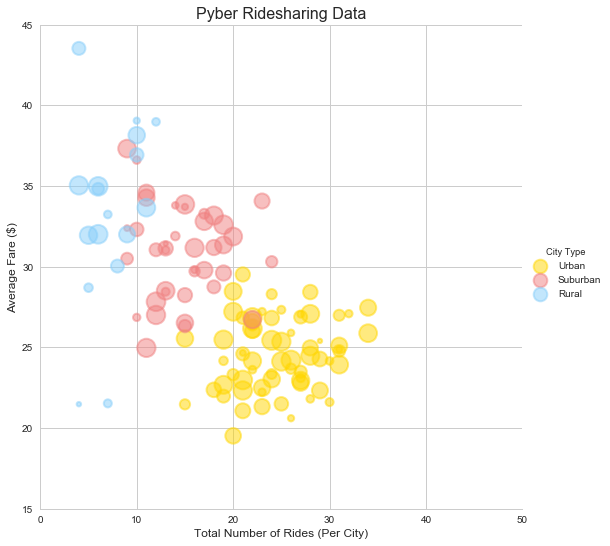

In [87]:
#-------------------------------
# Step 2: Generate bubble plot 
#-------------------------------

# x: count of rides per city
x_list = cityPlusRides_df.groupby(by='city')['ride_id'].count()
# y: average fare in each city
y_list = round(cityPlusRides_df.groupby(by='city')['fare'].mean(),2)
# z: driver count for each city
z_list = cityPlusRides_df.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']*5
# color: based on the type for each city
type_list = cityPlusRides_df.drop_duplicates(subset='city', keep='first').set_index('city')['type']

# create dataframe to work with
bubbleData_df = pd.DataFrame({'x':x_list,'y':y_list,'z':z_list,'City Type':type_list})

# create color list
color_list = {'Urban':'gold', 'Suburban':'lightcoral', 'Rural':'lightskyblue'}

# create scatterplot
sns.set(style='whitegrid', context='notebook')
bubblePlot=sns.lmplot(x='x', y='y', data=bubbleData_df, hue='City Type', palette=color_list,\
                      fit_reg=False, size=7.5,\
                      legend=True,legend_out=True,\
                      scatter_kws={'s':z_list, 'alpha':0.5, 'edgecolors':'face', 'linewidths':2})
plt.xlim(0,50)
plt.ylim(15,45)
plt.title("Pyber Ridesharing Data",{'fontname':'Arial','fontsize':16})
plt.xlabel("Total Number of Rides (Per City)",{'fontname':'Arial','fontsize':12})
plt.ylabel("Average Fare ($)",{'fontname':'Arial','fontsize':12})
plt.show()

## Total Fares by City Type
The majority of our revenue comes from our urban clientele, with 61.97%. However, at 31.45%, our suburban customers still account for a significant portion of our fare revenue.

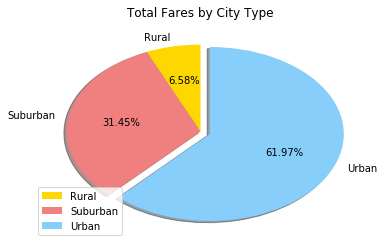

In [17]:
#---------------------------------------------
# Step 3: Generate fare by city type pie chart
#---------------------------------------------

# create dataframe
fareByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['fare'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [fareByCity_df['fare'][0]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][1]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][2]/fareByCity_df['fare'].sum()]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.075)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90,\
        colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Fares by City Type")
plt.show()

## Total Rides by City Type

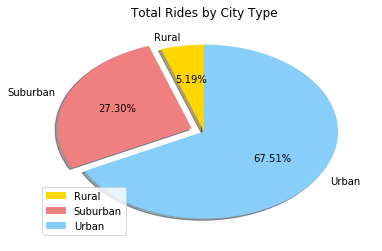

In [16]:
#---------------------------------------------
# Step 4: Generate rides by city type pie chart
#---------------------------------------------
# create dataframe
ridesByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['ride_id'].count())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [ridesByCity_df['ride_id']['Rural']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Suburban']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Urban']/ridesByCity_df['ride_id'].sum()]
explode = (0, 0.1, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%',\
        startangle=90, colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Rides by City Type")
plt.show()

## Total Drivers by City Type

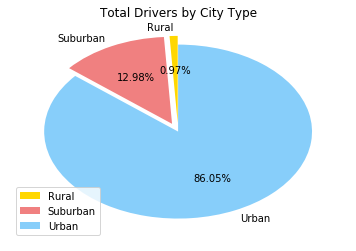

In [15]:
#---------------------------------------------
# Step 5: Generate drivers by city type pie chart
#---------------------------------------------
# create dataframe
driversByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['driver_count'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [driversByCity_df['driver_count']['Rural']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Suburban']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Urban']/driversByCity_df['driver_count'].sum()]
explode = (0.1, 0.1, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Drivers by City Type")
plt.show()